In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
sns.set(style="ticks")

In [2]:
sys.path.append('..')

In [3]:
def magnitude_order(num): # from python blog
    absnum = abs(num)
    order = np.log10(absnum)
    res = np.floor(order)
    return res

In [4]:
sys.path.append('..')

In [5]:
df_sp = pd.read_csv('municipalities_SP.csv')

## Some histograms

In [6]:
df_muns = pd.read_csv('age_groups_municipalities.csv')

In [7]:
df_muns = df_muns[['Municipio','Total']]

In [8]:
df_sp = df_sp.merge(df_muns, how = 'left',left_on = 'ID_MN_RESI', right_on = 'Municipio')

In [9]:
df_sp = df_sp.drop(columns = ['Unnamed: 0','Municipio'])

In [10]:
df_sp['Total_Approx'] = magnitude_order(df_sp['Total'])

In [11]:
df_sp['CASO_N'] = df_sp['CASO']/df_sp['Total']

Order of magnitude: 3.0. Cities: 41


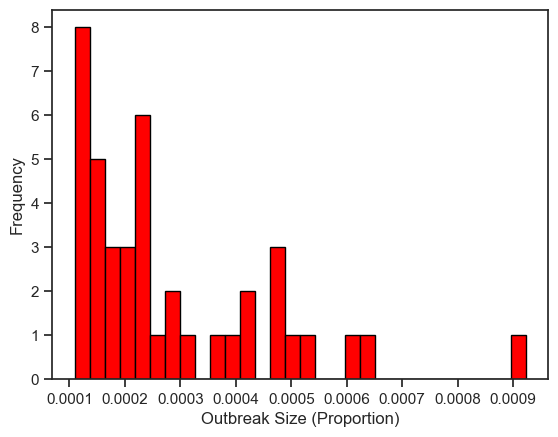

Order of magnitude: 4.0. Cities: 188


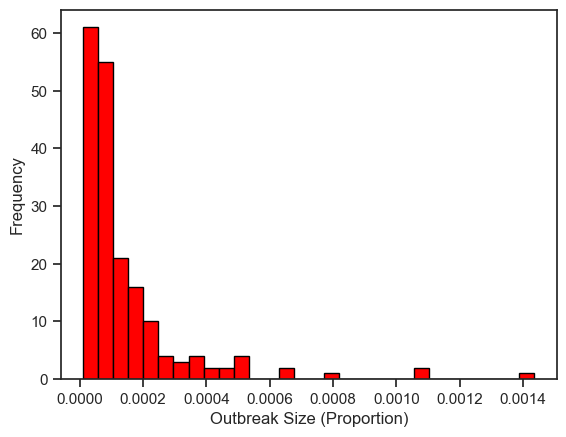

Order of magnitude: 5.0. Cities: 78


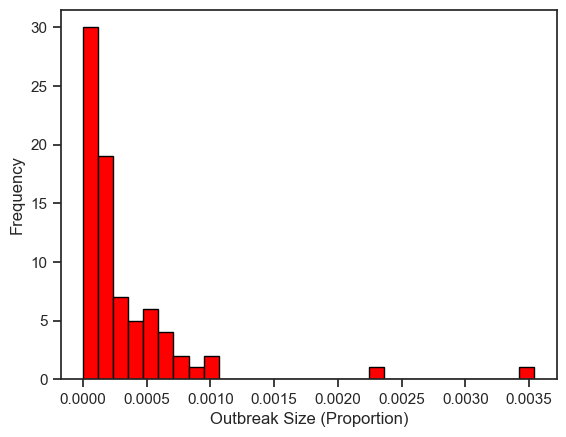

Order of magnitude: 6.0. Cities: 2


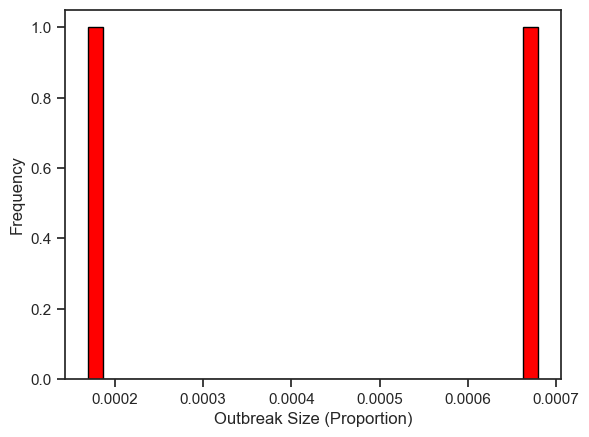

Order of magnitude: 7.0. Cities: 1


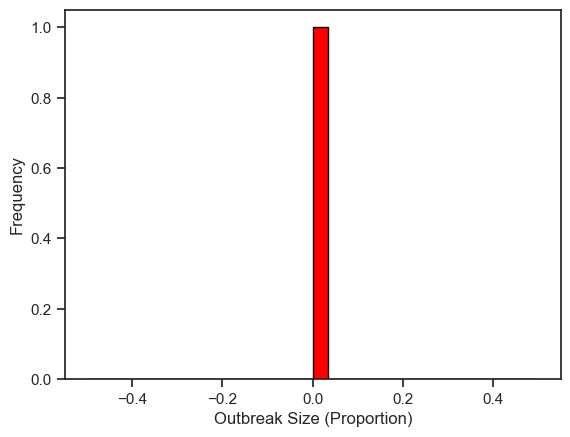

In [12]:
for o_mag in np.sort(df_sp['Total_Approx'].unique()):
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    #bins_vec = np.arange(0,0.5,0.0025)
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    plt.hist(df_sp_aux['CASO_N'], bins = 30, edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_5956\2043159141.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_sp_aux['CASO_N'], label = 'Order = '+str(o_mag), linewidth = 4)


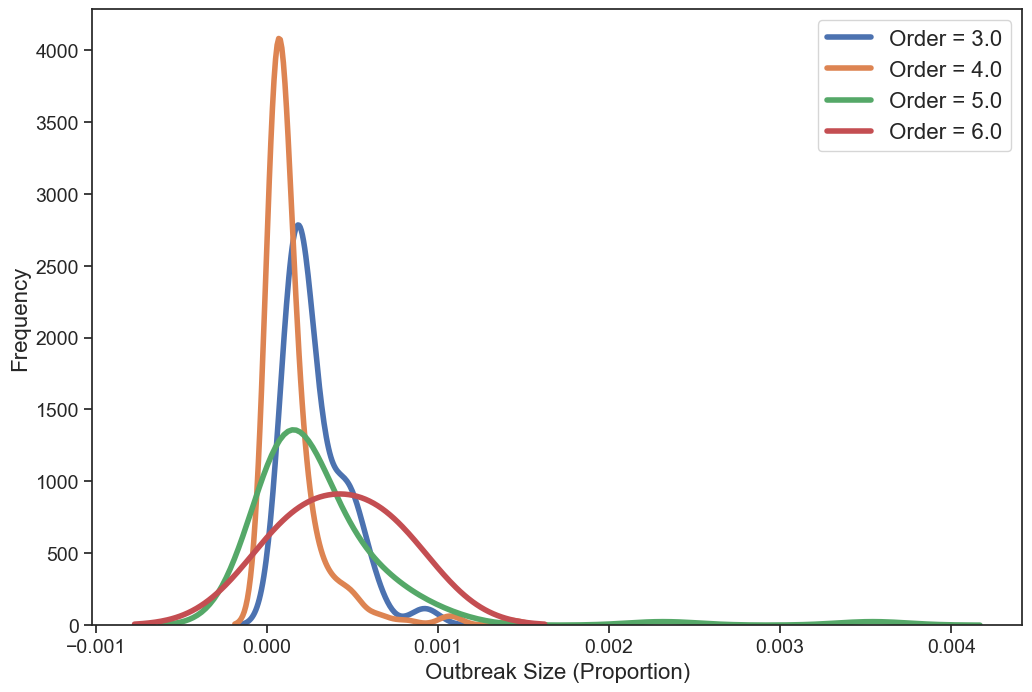

In [13]:
fig = plt.subplots(figsize = (12,8))
for o_mag in np.sort(df_sp['Total_Approx'].unique()):
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    sns.kdeplot(df_sp_aux['CASO_N'], label = 'Order = '+str(o_mag), linewidth = 4)
    plt.ylabel('Frequency', fontsize = 16)
    plt.xlabel('Outbreak Size (Proportion)', fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Comparison with the real-life data - SIR Model

1000
Order of magnitude: 3.0. Cities: 41


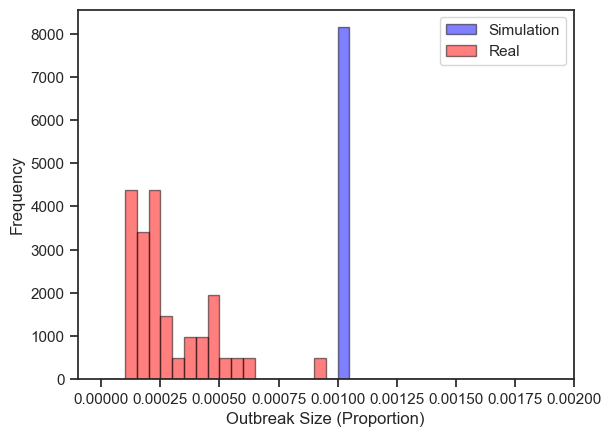

10000
Order of magnitude: 4.0. Cities: 188


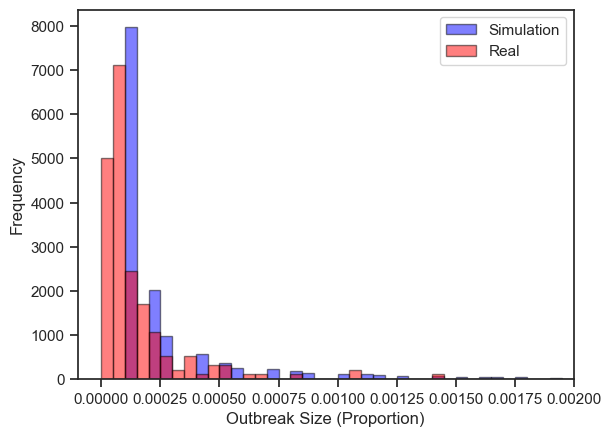

100000
Order of magnitude: 5.0. Cities: 78


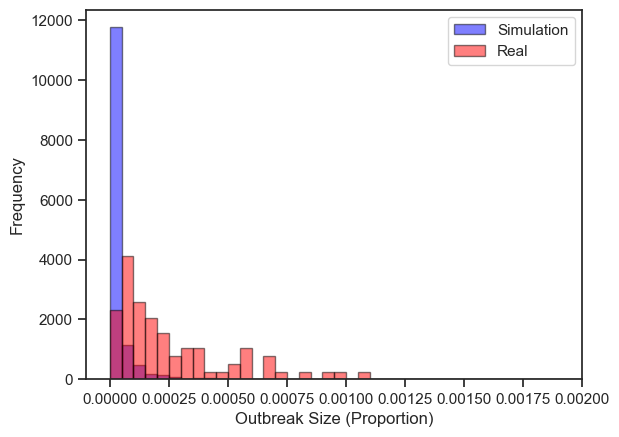

In [17]:
c = 0
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for o_mag in np.sort(df_sp['Total_Approx'].unique())[:3]:
    print(N_vec[c+1*c])
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    bins_vec = np.arange(0,0.09,0.00005)
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    plt.hist(df[c+1*c]/N_vec[c+1*c], bins = bins_vec, edgecolor = 'black', color = 'blue', alpha = 0.5, label = 'Simulation', density = True)
    plt.hist(df_sp_aux['CASO_N'], bins = bins_vec, edgecolor = 'black', color = 'red', alpha = 0.5, label = 'Real', density = True)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.xlim((-0.0001,0.002))
    plt.legend()
    c = c + 1
    plt.show()

1000
Order of magnitude: 3.0. Cities: 41


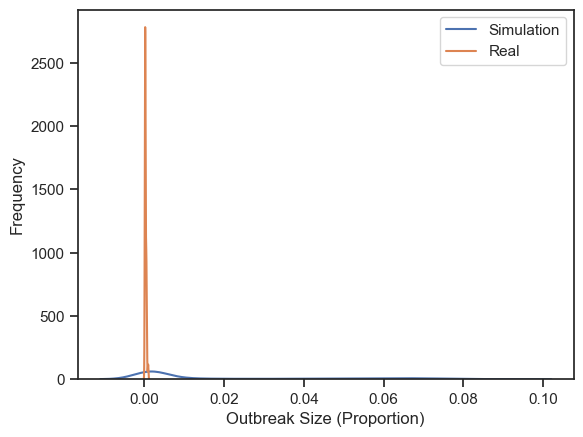

10000
Order of magnitude: 4.0. Cities: 188


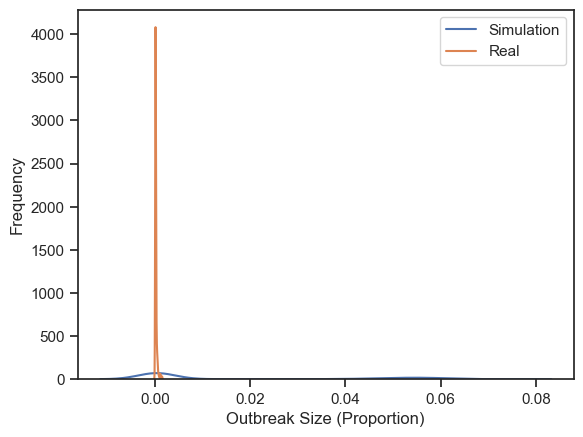

100000
Order of magnitude: 5.0. Cities: 78


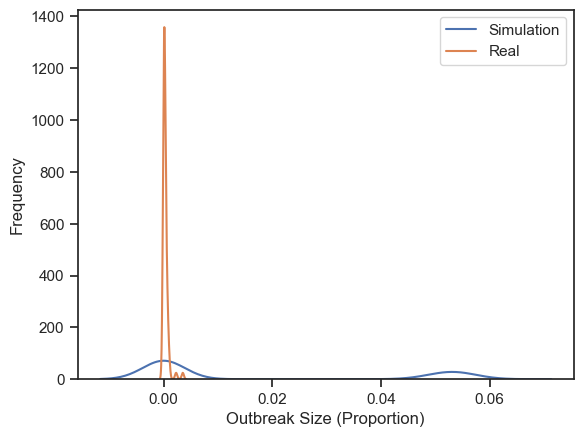

In [59]:
c = 0
files = ['measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for o_mag in np.sort(df_sp['Total_Approx'].unique())[:3]:
    print(N_vec[c+1*c])
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    sns.kdeplot(df[c+1*c]/N_vec[c+1*c], label = 'Simulation')
    sns.kdeplot(df_sp_aux['CASO_N'], label = 'Real')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    #plt.xlim((-0.001,0.005))
    c = c + 1
    plt.legend()
    plt.show()

## Improving comparison with the real-life data - SIR Model

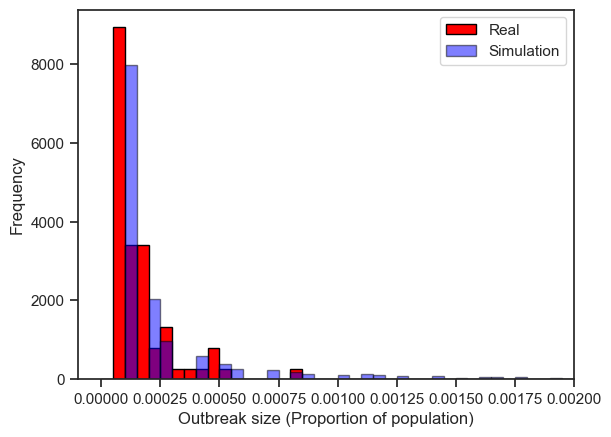

In [18]:
df_sp_10k = df_sp[df_sp['Total'] <= 20000]
df_sp_10k = df_sp_10k[df_sp_10k['Total'] >= 5000]
df = np.loadtxt(files[-1]) 
bins_vec = np.arange(0,0.09,0.00005)
plt.hist(df_sp_10k['CASO_N'], bins = bins_vec, color = 'red', edgecolor = 'black', label = 'Real' , density = True)
plt.hist(df[2]/10000, bins = bins_vec, color = 'blue', edgecolor = 'black', label = 'Simulation', alpha = 0.5, density = True)
plt.xlim((-0.0001,0.002))
plt.xlabel('Outbreak size (Proportion of population)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

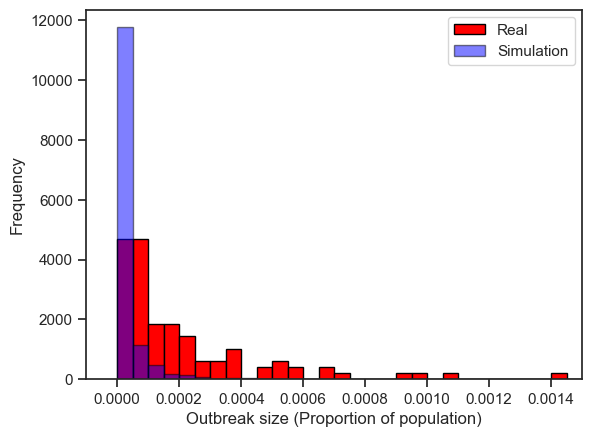

In [19]:
df_sp_10k = df_sp[df_sp['Total'] <= 200000]
df_sp_10k = df_sp_10k[df_sp_10k['Total'] >= 50000]
df = np.loadtxt(files[-1]) 
bins_vec = np.arange(0,0.09,0.00005)
plt.hist(df_sp_10k['CASO_N'], bins = bins_vec, color = 'red', edgecolor = 'black', label = 'Real' , density = True)
plt.hist(df[4]/100000, bins = bins_vec, color = 'blue', edgecolor = 'black', label = 'Simulation', alpha = 0.5, density = True)
plt.xlim((-0.0001,0.0015))
plt.xlabel('Outbreak size (Proportion of population)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

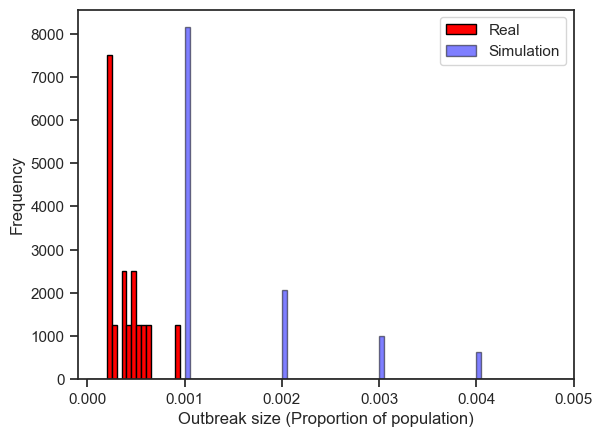

In [20]:
df_sp_10k = df_sp[df_sp['Total'] <= 5000]
df_sp_10k = df_sp_10k[df_sp_10k['Total'] >= 0]
df = np.loadtxt(files[-1]) 
bins_vec = np.arange(0,0.09,0.00005)
plt.hist(df_sp_10k['CASO_N'], bins = bins_vec, color = 'red', edgecolor = 'black', label = 'Real' , density = True)
plt.hist(df[0]/1000, bins = bins_vec, color = 'blue', edgecolor = 'black', label = 'Simulation', alpha = 0.5, density = True)
plt.xlim((-0.0001,0.005))
plt.xlabel('Outbreak size (Proportion of population)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Comparison with the real-life data - SEIR Model

1000
Order of magnitude: 3.0. Cities: 41


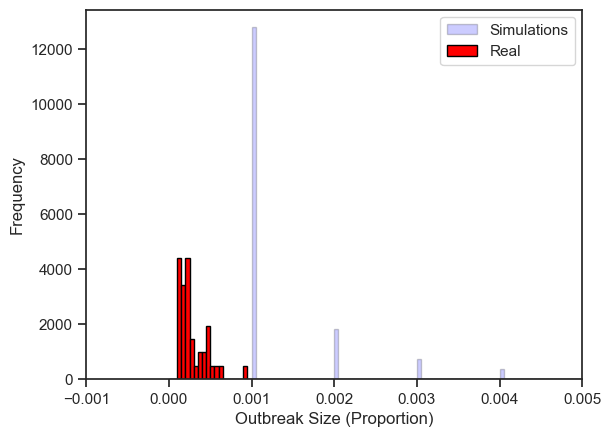

10000
Order of magnitude: 4.0. Cities: 188


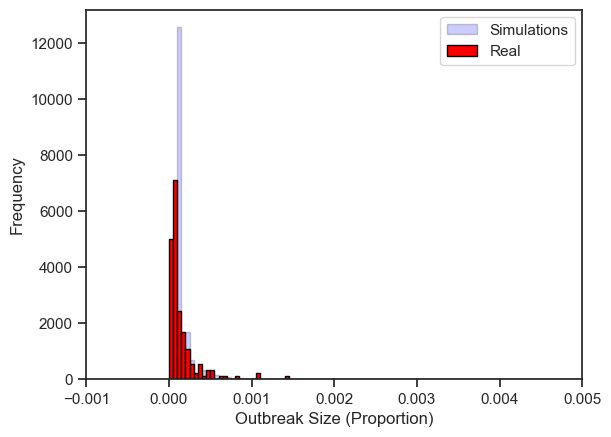

100000
Order of magnitude: 5.0. Cities: 78


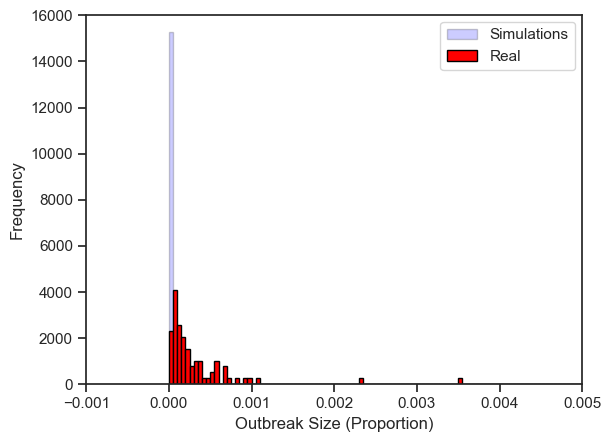

In [78]:
c = 0
files = ['GTP_fsize_inf_2e-06_0.03_500000_SEIR.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for o_mag in np.sort(df_sp['Total_Approx'].unique())[:3]:
    print(N_vec[c+1*c])
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    bins_vec = np.arange(0,0.09,0.00005)
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    plt.hist(df[c+1*c]/N_vec[c+1*c], bins = bins_vec, edgecolor = 'black', color = 'blue', label = 'Simulations', alpha = 0.2, density = True)
    plt.hist(df_sp_aux['CASO_N'], bins = bins_vec, edgecolor = 'black', label = 'Real', color = 'red', density = True)
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.legend()
    plt.xlim((-0.001,0.005))
    c = c + 1
    plt.show()

1000
Order of magnitude: 3.0. Cities: 41


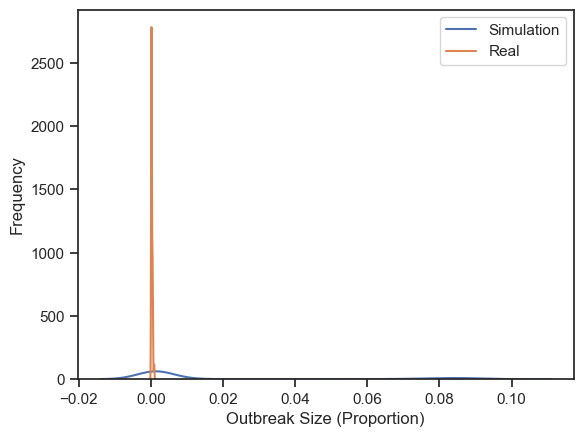

10000
Order of magnitude: 4.0. Cities: 188


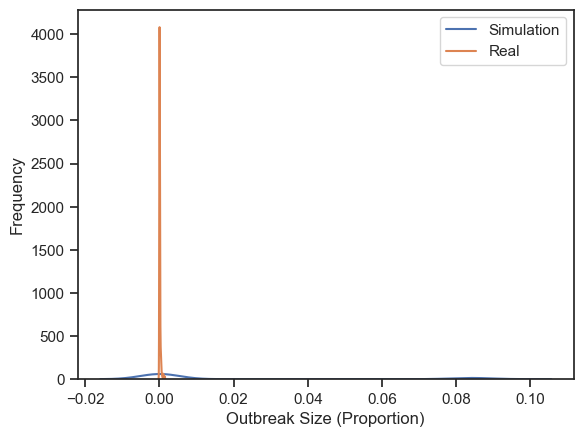

100000
Order of magnitude: 5.0. Cities: 78


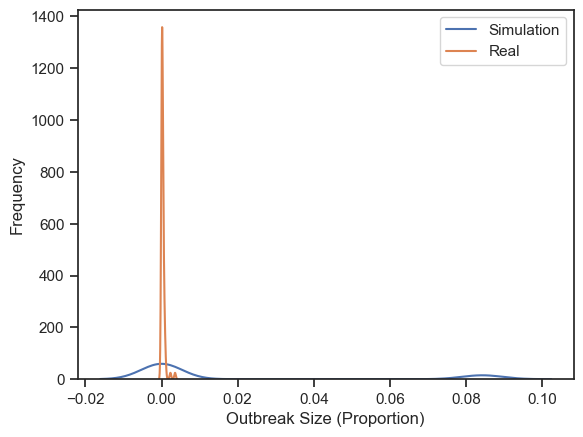

In [17]:
c = 0
files = ['GTP_fsize_inf_2e-06_0.03_500000_SEIR.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
df = np.loadtxt(files[-1])
for o_mag in np.sort(df_sp['Total_Approx'].unique())[:3]:
    print(N_vec[c+1*c])
    df_sp_aux = df_sp[df_sp['Total_Approx'] == o_mag]
    print('Order of magnitude: '+str(o_mag)+'. Cities: '+str(len(df_sp_aux)))
    sns.kdeplot(df[c+1*c]/N_vec[c+1*c], label = 'Simulation')
    sns.kdeplot(df_sp_aux['CASO_N'], label = 'Real')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    #plt.xlim((-0.001,0.005))
    c = c + 1
    plt.legend()
    plt.show()

(-0.0001, 0.003)

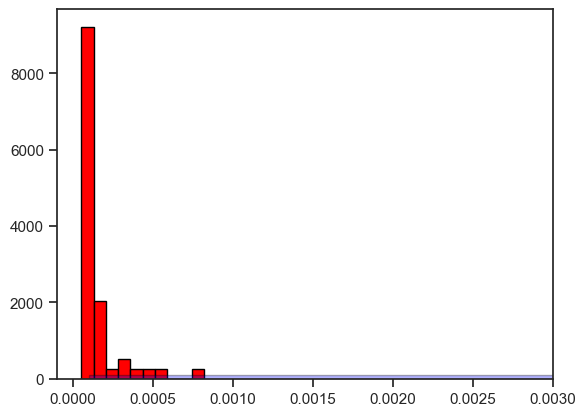

In [19]:
df_sp_10k = df_sp[df_sp['Total'] <= 20000]
df_sp_10k = df_sp_10k[df_sp_10k['Total'] >= 10000]
df = np.loadtxt(files[-1]) 
plt.hist(df_sp_10k['CASO_N'], color = 'red', edgecolor = 'black', density = True)
plt.hist(df[2]/10000, color = 'blue', edgecolor = 'black', alpha = 0.3, density = True)
plt.xlim((-0.0001,0.003))

# Comparing the SIR and SEIR models

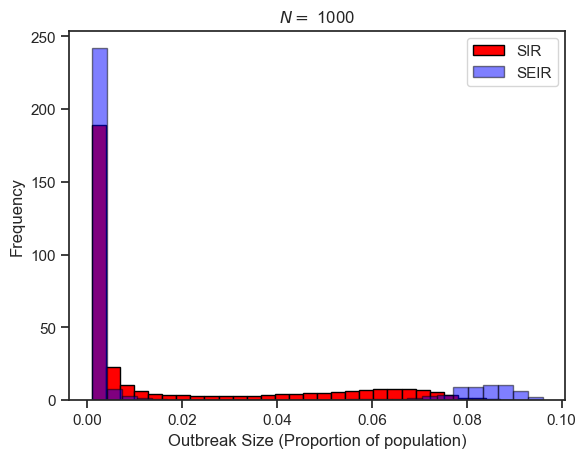

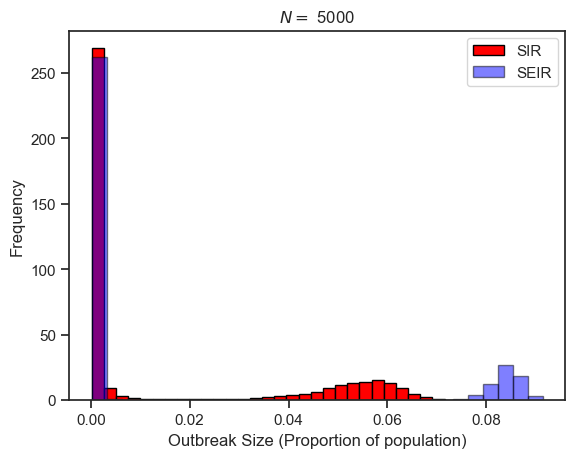

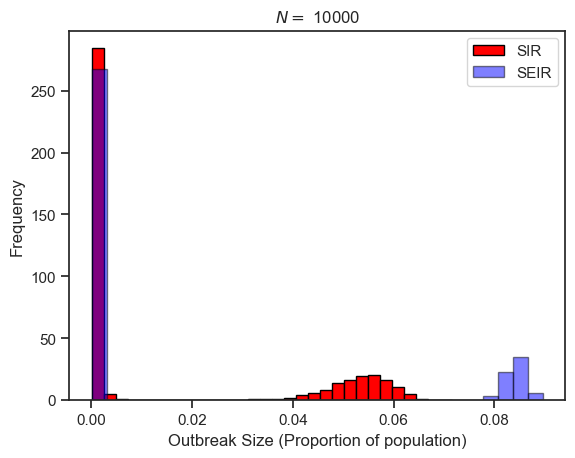

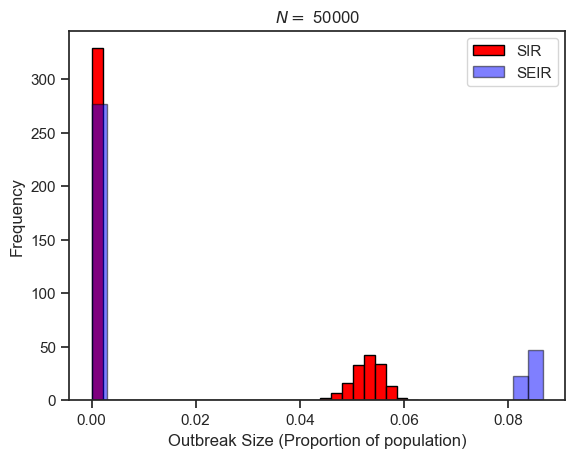

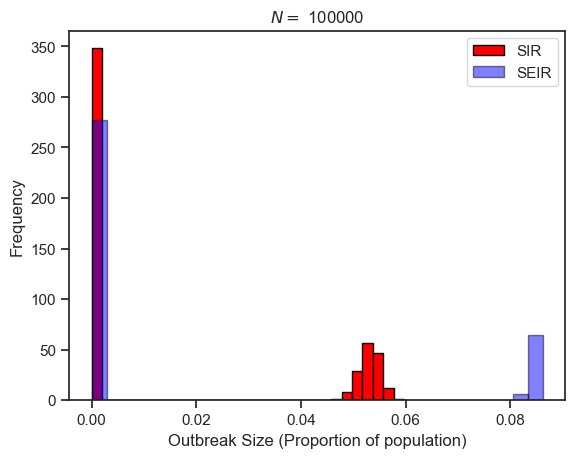

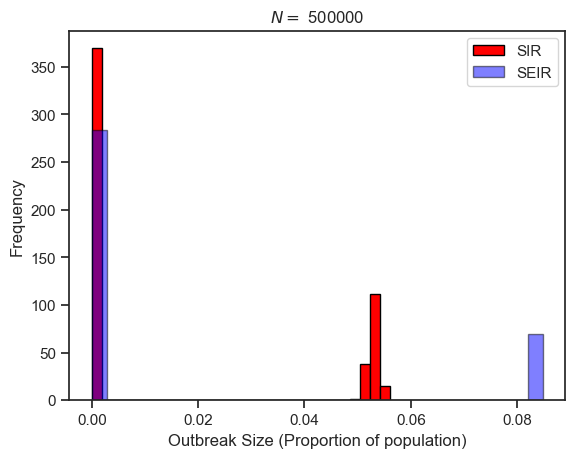

In [24]:
file_1 = 'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv'
file_2 = 'GTP_fsize_inf_2e-06_0.03_500000_SEIR.csv'
df_1 = np.loadtxt(file_1)
df_2 = np.loadtxt(file_2)
N_vec = [1000,5000,10000,50000,100000,500000]
for i in range(len(N_vec)):
    plt.hist(df_1[i]/N_vec[i], bins = 30, edgecolor = 'black', color = 'red', density = True, label = 'SIR')
    plt.hist(df_2[i]/N_vec[i], bins = 30, edgecolor = 'black', color = 'blue',  density = True, label = 'SEIR', alpha = 0.5)
    plt.xlabel('Outbreak Size (Proportion of population)')
    plt.ylabel('Frequency')
    plt.title(r'$N = $ '+ str(N_vec[i]))
    plt.legend()
    plt.show()
    

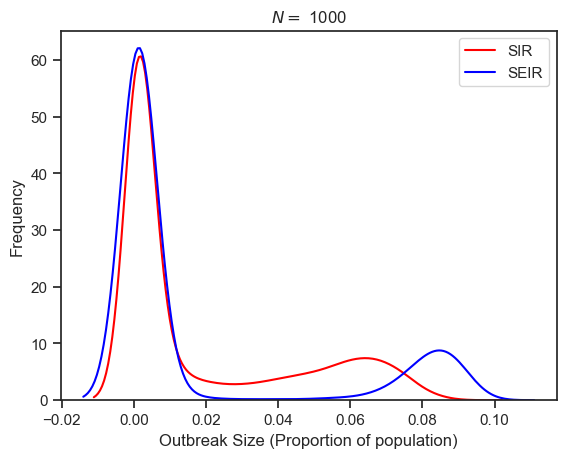

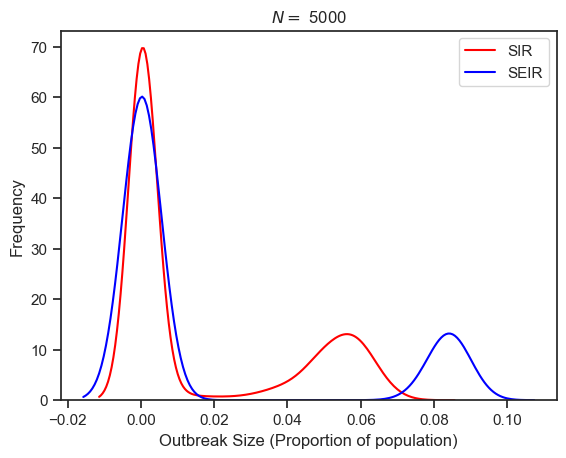

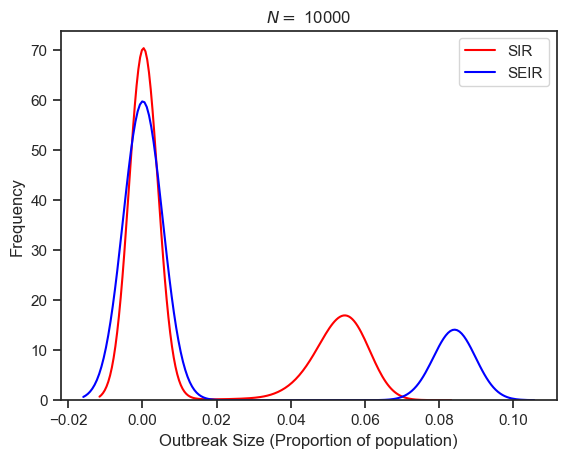

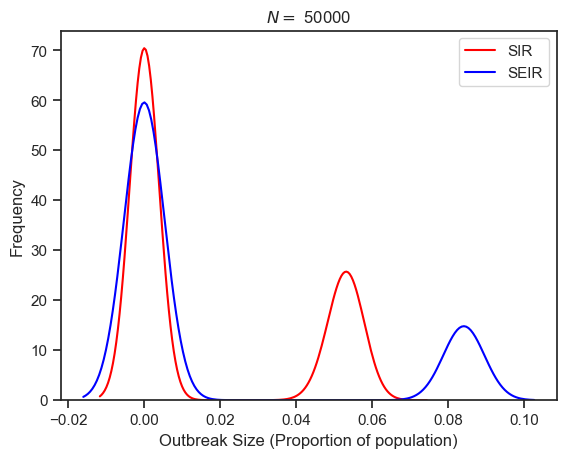

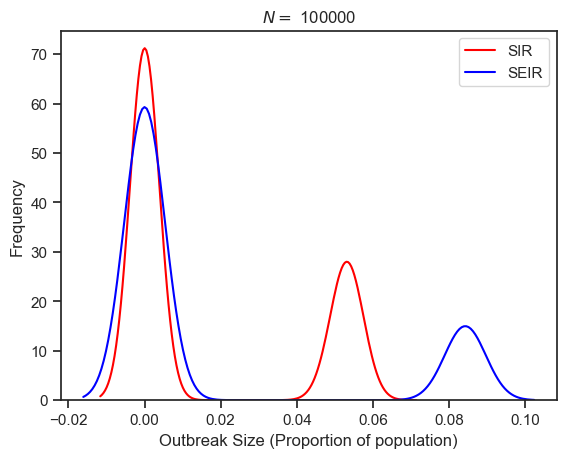

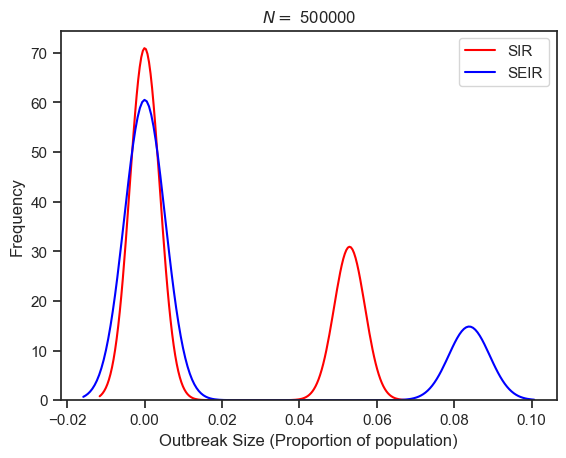

In [27]:
file_1 = 'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv'
file_2 = 'GTP_fsize_inf_2e-06_0.03_500000_SEIR.csv'
df_1 = np.loadtxt(file_1)
df_2 = np.loadtxt(file_2)
N_vec = [1000,5000,10000,50000,100000,500000]
for i in range(len(N_vec)):
    sns.kdeplot(df_1[i]/N_vec[i], color = 'red', label = 'SIR')
    sns.kdeplot(df_2[i]/N_vec[i], color = 'blue',   label = 'SEIR')
    plt.xlabel('Outbreak Size (Proportion of population)')
    plt.ylabel('Frequency')
    plt.title(r'$N = $ '+ str(N_vec[i]))
    plt.legend()
    plt.show()
    

## Maps of SP

In [17]:
map_br = geobr.read_municipality()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-p

In [18]:
map_br['code_muni'] = map_br['code_muni'].astype(str).str[:6].astype(int)
map_br = map_br.merge(df_sp, how = 'left', left_on = 'code_muni', right_on = 'ID_MN_RESI')

In [19]:
map_br = map_br[map_br['abbrev_state'] == 'SP']

In [20]:
map_br['CASO_100'] = map_br['CASO_N']*(10**5)

In [21]:
map_br['CASO_100_LOG'] = np.log(map_br['CASO_100'])

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

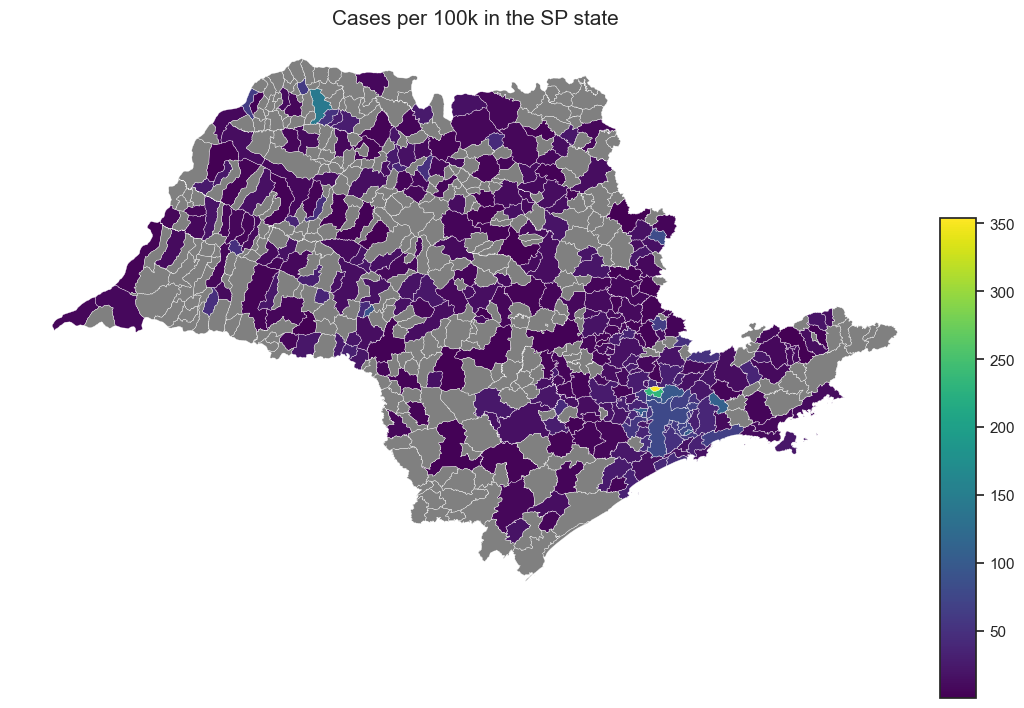

In [22]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='CASO_100', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["CASO_100"].min(),  
            vmax=map_br["CASO_100"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

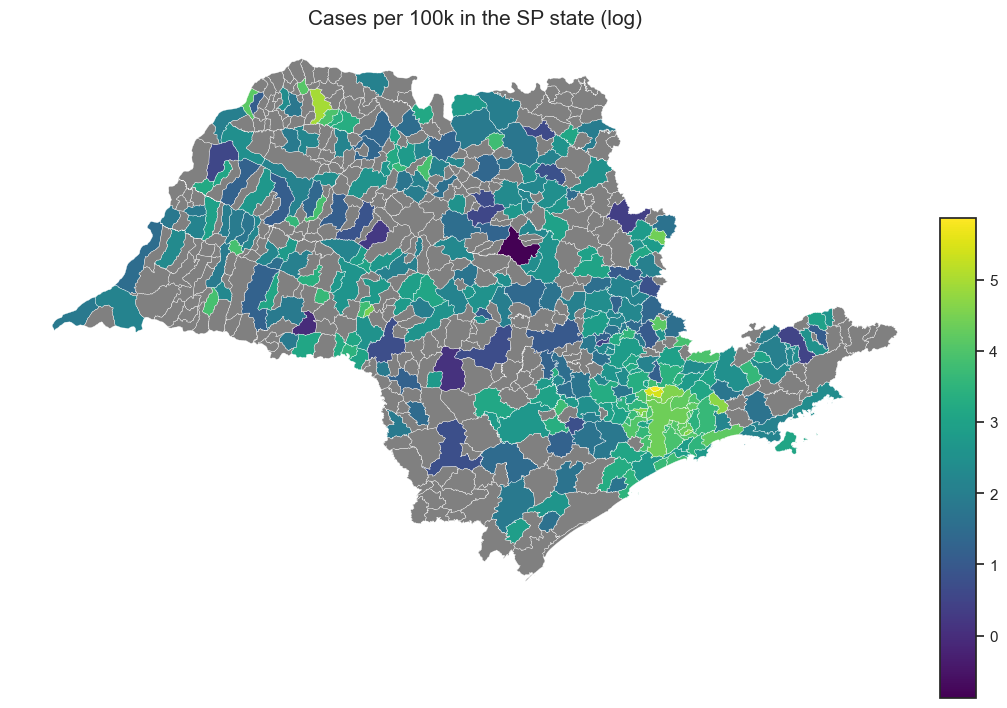

In [23]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='CASO_100_LOG', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["CASO_100_LOG"].min(),  
            vmax=map_br["CASO_100_LOG"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state (log)",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

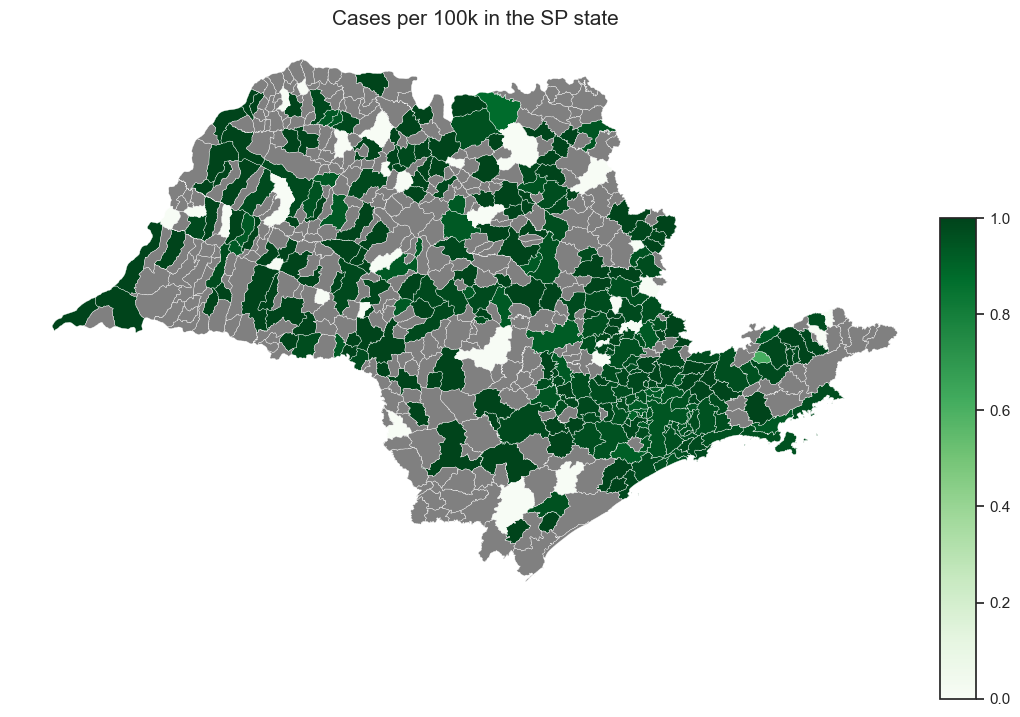

In [24]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='COV_1', 
        missing_kwds=missing_kwds,
        linewidth=0.25, 
        cmap = 'Greens'
    )


cax = fig.add_axes(
        [
            0.9,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="Greens",                                       
        norm=plt.Normalize(
            vmin=map_br["COV_1"].min(),  
            vmax=map_br["COV_1"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Cases per 100k in the SP state",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.show()